Para este ejercicio, vamos a utilizar Hotel Booking Demand Dataset (hotels.csv)

#Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

# Importando el conjunto de datos

In [9]:
df_hotels = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv')
df_hotels.head(5)

In [10]:
df_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
df_hotels = df_hotels.reset_index().rename(columns={'index':'id'})

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Ejercicios

## Pregunta 1

Cree una función con un argumento formado en DataFrame para verificar el tipo de datos, la cantidad de valores nulos, el porcentaje de valores nulos y la cantidad de valores únicos para cada columna

In [13]:
def check_values(df):
    data = []
    for column in df.columns:
      data.append([column,df[column].dtype,df[column].isna().sum(),round(100*(df[column].isna().sum()/len(df)),2),df[column].nunique()])
    return pd.DataFrame(columns=['Data_Features','Data_Type','Null','Null_Percentage','Unique_Value'], data=data)
check_values(df_hotels)

,Data_Features,Data_Type,Null,Null_Percentage,Unique_Value
0,hotel,object,0,0.00,2
1,is_canceled,int64,0,0.00,2
2,lead_time,int64,0,0.00,479
3,arrival_date_year,int64,0,0.00,3
4,arrival_date_month,object,0,0.00,12
5,arrival_date_week_number,int64,0,0.00,53
6,arrival_date_day_of_month,int64,0,0.00,31
7,stays_in_weekend_nights,int64,0,0.00,17
8,stays_in_week_nights,int64,0,0.00,35
9,adults,int64,0,0.00,14


## Pregunta 2

¿Cuántos visitantes hay que cancelan la reserva y cuántos no? ¡Y a partir de esa cifra, saca conclusiones sobre las proporciones de cada uno!

In [15]:
df_hotels.is_canceled.value_counts()

,count
is_canceled,
0,75166
1,44224


El que cancela la reserva se valora como 1 y el que no lo hace se valora como 0 en la columna 'is_canceled'

En segundo lugar, podemos utilizar `normalize=True` dentro de los corchetes de `value_counts()` para normalizar los valores y poder ver la proporción de cada valor

In [16]:
df_hotels.is_canceled.value_counts(normalize=True)

,proportion
is_canceled,
0,0.629584
1,0.370416


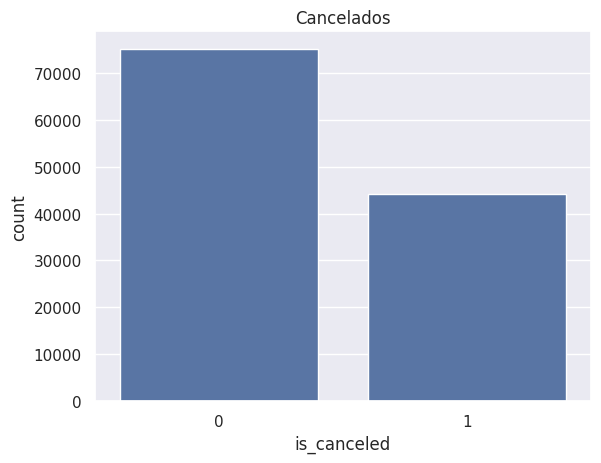

In [19]:
sns.countplot(data=df_hotels, x='is_canceled')
plt.title('Cancelados')
plt.show()